In [2]:
!kaggle datasets download -d mirichoi0218/insurance

from zipfile import ZipFile
import os
for i in os.listdir('C:/Users/mehmu/Desktop/GAIH/1'):
    if '.zip' in i:
        print(i)
        with ZipFile(i, 'r') as zipObj:
            zipObj.extractall()
        os.remove(i)

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
insurance.zip


In [ ]:
!pip install numpy pandas seaborn matplotlib 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings 

warnings.simplefilter('ignore')

df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Dönüşümler - Preprocessing

One hot encoding yerine get_dummies kullanıyorum...

In [35]:
from sklearn.preprocessing import LabelEncoder

gender=pd.get_dummies(df.sex)

gender.columns=['female','male']

df= pd.concat([df,gender],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [36]:
df.drop('sex',axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.region=le.fit_transform(df.region)
df.smoker=le.fit_transform(df.smoker)
df


,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,1,3,16884.92400,1,0
1,18,33.770,1,0,2,1725.55230,0,1
2,28,33.000,3,0,2,4449.46200,0,1
3,33,22.705,0,0,1,21984.47061,0,1
4,32,28.880,0,0,1,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830,0,1
1334,18,31.920,0,0,0,2205.98080,1,0
1335,18,36.850,0,0,2,1629.83350,1,0
1336,21,25.800,0,0,3,2007.94500,1,0


### Görselleştirme

Normalizasyon için log dönüşümü grafikleri değiştirip daha iyi sonuç almamızı sağlayabilir...

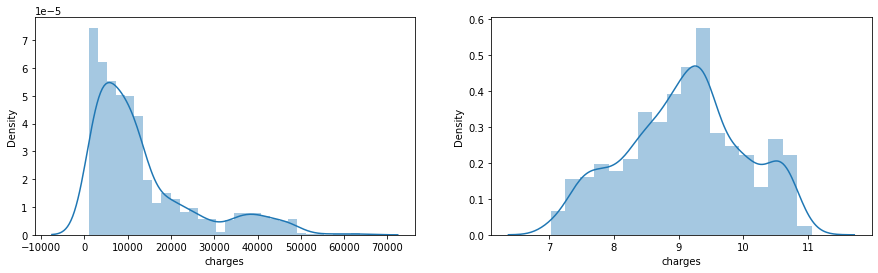

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sbn.distplot(df.charges)


plt.subplot(1,2,2)
sbn.distplot(np.log1p(df.charges))


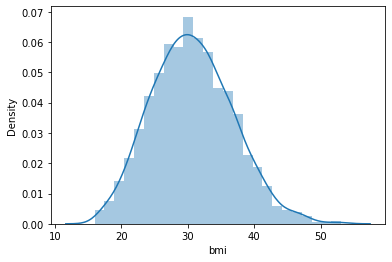

In [39]:
sbn.distplot(df.bmi)

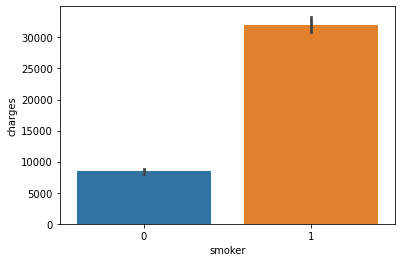

In [41]:
sbn.barplot(df.smoker,df.charges)

#sbn.jointplot(df.smoker,df.charges)

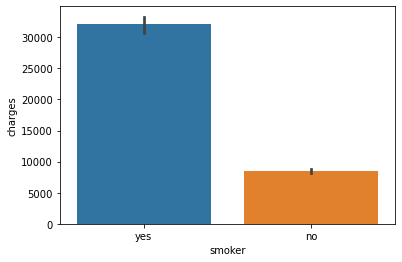

In [30]:
sbn.barplot(df.smoker,df.charges)
#sbn.jointplot(df.smoker,df.charges)

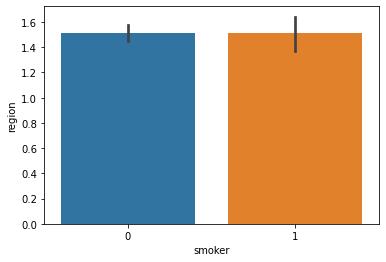

In [46]:
sbn.barplot(df.smoker,df.region)
#sbn.jointplot(df.smoker,df.region)

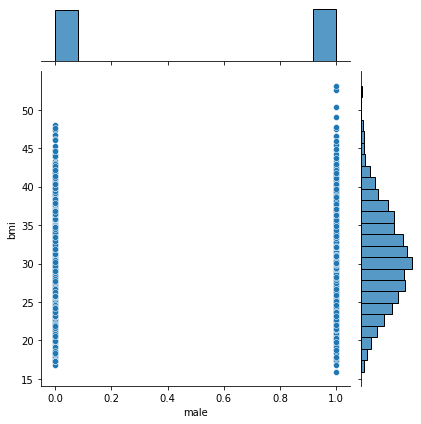

In [11]:
sbn.jointplot(df['male'],df['bmi'])

In [12]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

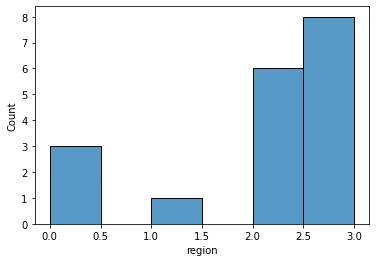

In [43]:
sbn.histplot(df.region[df.children==5])

0.10927188154853519

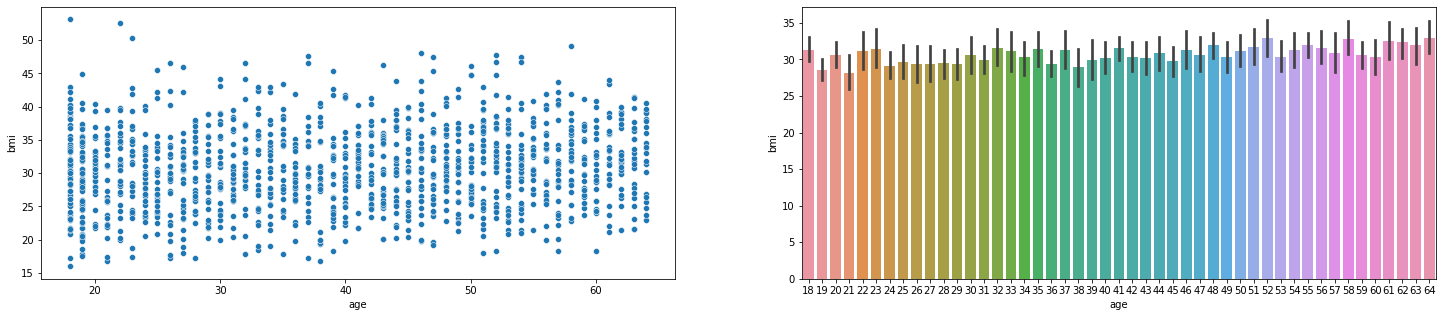

In [44]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,5))

ax[0]=sbn.scatterplot(df.age,df.bmi,ax=ax[0])
ax[1]=sbn.barplot(df.age,df.bmi)
df.age.corr(df.bmi)

0.012758900820673835

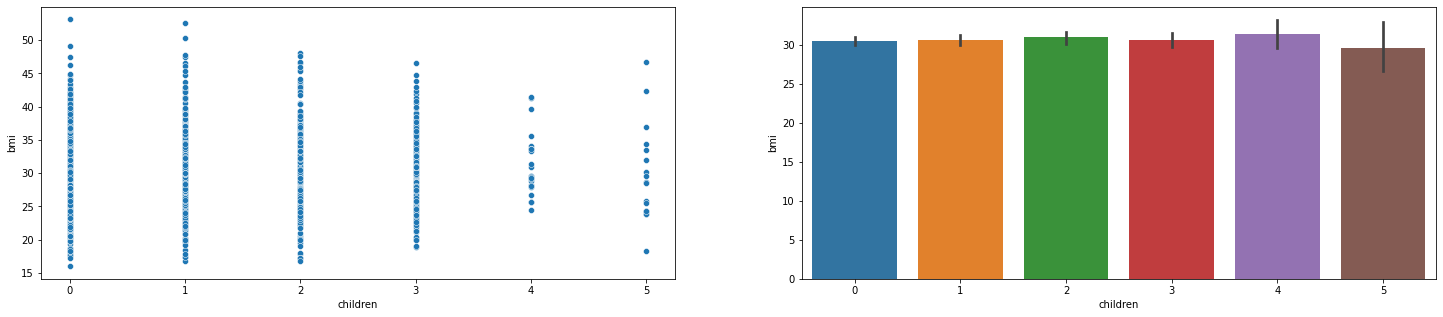

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,5))

ax[0]=sbn.scatterplot(df.children,df.bmi,ax=ax[0])
ax[1]=sbn.barplot(df.children,df.bmi)
df.children.corr(df.bmi)

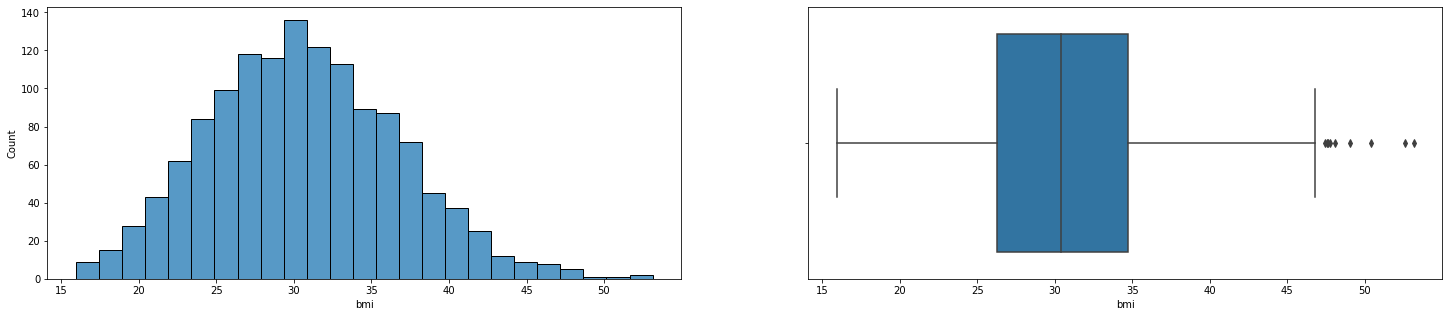

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,5))

ax[0]=sbn.histplot(df.bmi,ax=ax[0])
ax[1]=sbn.boxplot(df.bmi)



In [17]:
from scipy import stats

z=stats.zscore(df.bmi)
print(max(z))

df.bmi.describe()

3.685522232281654


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

### Model 

In [18]:
X=df.drop('charges',axis=1)
y=df.charges

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor,Ridge,Lasso,BayesianRidge
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, mean_absolute_error

In [24]:
regressor = {
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "BayesianRidge":BayesianRidge(),
    "SGD": SGDRegressor(),
    "KNN": KNeighborsRegressor(), 
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(max_depth=3, random_state=2),
    "MLP": MLPRegressor(max_iter=1000),
    "XGB": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    'catboost': CatBoostRegressor()
}

results = pd.DataFrame(columns=["Regressor", "rmse", "r2"])
for name, clf in regressor.items():
    model = clf
    print(model)
    
    clf.fit(X_train_scaled,y_train)
    predictions = clf.predict(X_test_scaled)
    results = results.append({
        "Regressor": name,
        "rmse": np.sqrt(np.square(y_test - predictions)).mean(),
        "r2": 1 - np.square(y_test - predictions).sum()/np.square(y_test - y_test.mean()).sum(),
        'mae': mean_absolute_error(y_test, predictions)

    }, ignore_index=True)
    
results

Ridge()
Lasso()
BayesianRidge()
SGDRegressor()
KNeighborsRegressor()
DecisionTreeRegressor()
RandomForestRegressor(max_depth=3, random_state=2)
MLPRegressor(max_iter=1000)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
LGBMRegressor()
Learning rate set to 0.040239
0:	learn: 11761.9965561	total: 133ms	remaining: 2m 1

,Regressor,rmse,r2,mae
0,Ridge,4205.799499,0.760259,4205.799499
1,Lasso,4204.261808,0.760265,4204.261808
2,BayesianRidge,4207.216611,0.760252,4207.216611
3,SGD,4218.373545,0.759620,4218.373545
4,KNN,3071.286463,0.820465,3071.286463
5,DT,3088.895218,0.699607,3088.895218
6,RF,2817.764835,0.848557,2817.764835
7,MLP,7406.680874,0.108029,7406.680874
8,XGB,2880.800001,0.814996,2880.800001
9,LGBM,2802.129403,0.841729,2802.129403


En iyi model hangisiyse onu giriyoruz. Ayarlarına dokümantasyonundan bakıp olabilecek kombinasyonları giriyoruz.

In [27]:
clf = Ridge(random_state=0)
params = {
    'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.033, 0.003, 0.004],
    'tol':[i*0.1 for i in range(1,20)],
    'max_iter':[i*10 for i in range(1,20)]
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train_scaled, y_train)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'alpha': 0.033, 'max_iter': 10, 'tol': 0.1}


In [29]:
predictions = clf.predict(X_test_scaled)
result = {
        'Regressor': 'Ridge',
        "rmse": np.sqrt(np.square(y_test - predictions)).mean(),
        "r2": 1 - np.square(y_test - predictions).sum()/np.square(y_test - y_test.mean()).sum(),
        'mae': mean_absolute_error(y_test, predictions)
    }
result

{'Regressor': 'Ridge',
 'rmse': 4204.461374373207,
 'r2': 0.7602639469427054,
 'mae': 4204.461374373207}